In [93]:
import xarray as xr
import numpy as np

In [105]:
ds = xr.open_zarr("D:\\EOData\\CyanoAlert\\DataCubes\\Sweden\\LakesSE\\OLCI-SE-L2C-CUBE-v2-20180708_1_500_509.zarr")

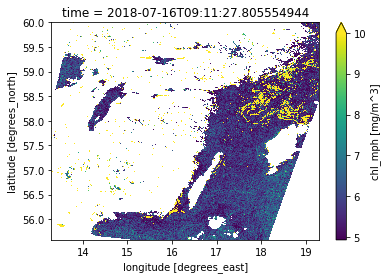

In [106]:
ds.chl_mph.isel(time=15).plot.imshow(vmax=10)

In [107]:
ds_mean = ds.mean(dim="time", skipna=True)

In [108]:
ds_mean

<xarray.Dataset>
Dimensions:         (bnds: 2, lat: 1500, lon: 2036)
Coordinates:
  * lat             (lat) float64 60.0 60.0 59.99 59.99 ... 55.59 55.58 55.58
    lat_bnds        (lat, bnds) float64 dask.array<shape=(1500, 2), chunksize=(500, 2)>
  * lon             (lon) float64 13.3 13.3 13.31 13.31 ... 19.29 19.3 19.3
    lon_bnds        (lon, bnds) float64 dask.array<shape=(2036, 2), chunksize=(509, 2)>
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc       (lat, lon) float64 dask.array<shape=(1500, 2036), chunksize=(500, 509)>
    chl_mph         (lat, lon) float64 dask.array<shape=(1500, 2036), chunksize=(500, 509)>
    iop_adg         (lat, lon) float64 dask.array<shape=(1500, 2036), chunksize=(500, 509)>
    iop_agelb       (lat, lon) float64 dask.array<shape=(1500, 2036), chunksize=(500, 509)>
    kd_z90max       (lat, lon) float64 dask.array<shape=(1500, 2036), chunksize=(500, 509)>
    tsm_c2rcc       (lat, lon) float64 dask.array<shape=(1500, 2036), chunk

D:\Miniconda3\envs\xcube-dev\lib\site-packages\dask\array\numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


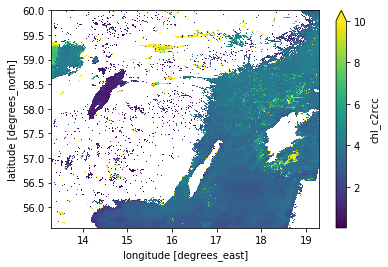

In [109]:
ds_mean.chl_c2rcc.plot.imshow(vmax=10)

In [122]:
def mean(obj, dim):
    # note: apply always moves core dimensions to the end
    return xr.apply_ufunc(np.nanmean, 
                          obj,
                          input_core_dims=[[dim]],
                          dask='parallelized',  # 'allowed'
                          kwargs={'axis': -1},
                          output_dtypes=[np.float64])

In [123]:
ds_rechunked = ds.chunk(dict(time=-1, lat=50, lon=50))

In [124]:
ds_rechunked

<xarray.Dataset>
Dimensions:         (bnds: 2, lat: 1500, lon: 2036, time: 62)
Coordinates:
  * lat             (lat) float64 60.0 60.0 59.99 59.99 ... 55.59 55.58 55.58
    lat_bnds        (lat, bnds) float64 dask.array<shape=(1500, 2), chunksize=(50, 2)>
  * lon             (lon) float64 13.3 13.3 13.31 13.31 ... 19.29 19.3 19.3
    lon_bnds        (lon, bnds) float64 dask.array<shape=(2036, 2), chunksize=(50, 2)>
  * time            (time) datetime64[ns] 2018-07-01T09:00:19.818425600 ... 2018-08-30T09:44:44.560468224
    time_bnds       (time, bnds) datetime64[ns] dask.array<shape=(62, 2), chunksize=(62, 2)>
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc       (time, lat, lon) float64 dask.array<shape=(62, 1500, 2036), chunksize=(62, 50, 50)>
    chl_mph         (time, lat, lon) float64 dask.array<shape=(62, 1500, 2036), chunksize=(62, 50, 50)>
    iop_adg         (time, lat, lon) float64 dask.array<shape=(62, 1500, 2036), chunksize=(62, 50, 50)>
    iop_agelb   

In [125]:

ds_mean = mean(ds_rechunked, dim="time")

In [126]:
ds_mean

<xarray.Dataset>
Dimensions:         (bnds: 2, lat: 1500, lon: 2036)
Coordinates:
  * lat             (lat) float64 60.0 60.0 59.99 59.99 ... 55.59 55.58 55.58
    lat_bnds        (lat, bnds) float64 dask.array<shape=(1500, 2), chunksize=(50, 2)>
  * lon             (lon) float64 13.3 13.3 13.31 13.31 ... 19.29 19.3 19.3
    lon_bnds        (lon, bnds) float64 dask.array<shape=(2036, 2), chunksize=(50, 2)>
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc       (lat, lon) float64 dask.array<shape=(1500, 2036), chunksize=(50, 50)>
    chl_mph         (lat, lon) float64 dask.array<shape=(1500, 2036), chunksize=(50, 50)>
    iop_adg         (lat, lon) float64 dask.array<shape=(1500, 2036), chunksize=(50, 50)>
    iop_agelb       (lat, lon) float64 dask.array<shape=(1500, 2036), chunksize=(50, 50)>
    kd_z90max       (lat, lon) float64 dask.array<shape=(1500, 2036), chunksize=(50, 50)>
    tsm_c2rcc       (lat, lon) float64 dask.array<shape=(1500, 2036), chunksize=(50, 50

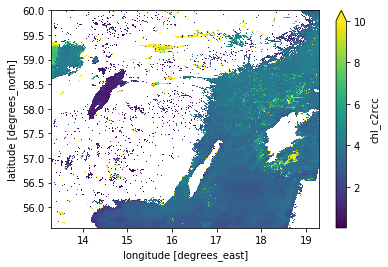

In [127]:
ds_mean.chl_c2rcc.plot.imshow(vmax=10)

In [132]:
np.sum(ds_mean.chl_c2rcc - ds.chl_c2rcc.mean(dim="time", skipna=True)).compute()

<xarray.DataArray 'chl_c2rcc' ()>
array(0.)

In [134]:
ds2 = xr.concat([ds[var_name] for var_name in ds.data_vars], "var")

In [140]:

var_coords=xr.DataArray([var_name for var_name in ds.data_vars], dims=["var"])
var_coords

<xarray.DataArray (var: 8)>
array(['chl_c2rcc', 'chl_mph', 'iop_adg', 'iop_agelb', 'kd_z90max',
       'tsm_c2rcc', 'tur_nechad_665', 'tur_nechad_865'], dtype='<U14')
Dimensions without coordinates: var

In [143]:
ds2.assign_coords(var=var_coords)

<xarray.DataArray 'chl_c2rcc' (var: 8, time: 62, lat: 1500, lon: 2036)>
dask.array<shape=(8, 62, 1500, 2036), dtype=float64, chunksize=(1, 1, 500, 509)>
Coordinates:
  * lat      (lat) float64 60.0 60.0 59.99 59.99 ... 55.59 55.59 55.58 55.58
  * lon      (lon) float64 13.3 13.3 13.31 13.31 13.31 ... 19.29 19.29 19.3 19.3
  * time     (time) datetime64[ns] 2018-07-01T09:00:19.818425600 ... 2018-08-30T09:44:44.560468224
  * var      (var) <U14 'chl_c2rcc' 'chl_mph' ... 'tur_nechad_865'
Attributes:
    spatial_resampling:  Nearest